In [1]:
import numpy as np
from sage.all import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%reload_ext autoreload
%autoreload 2

import Wigner

In [2]:
# Load data
F = GF(3**3, 'a')
a = F.gen()

In [3]:
two = F(2)
two

2

In [4]:
F = [F(0)] + [a**j for j in range(27-1)]
F

[0,
 1,
 a,
 a^2,
 a + 2,
 a^2 + 2*a,
 2*a^2 + a + 2,
 a^2 + a + 1,
 a^2 + 2*a + 2,
 2*a^2 + 2,
 a + 1,
 a^2 + a,
 a^2 + a + 2,
 a^2 + 2,
 2,
 2*a,
 2*a^2,
 2*a + 1,
 2*a^2 + a,
 a^2 + 2*a + 1,
 2*a^2 + 2*a + 2,
 2*a^2 + a + 1,
 a^2 + 1,
 2*a + 2,
 2*a^2 + 2*a,
 2*a^2 + 2*a + 1,
 2*a^2 + 1]

In [6]:
mubs = np.load('MUBS/3-3-desarguesian.npy')
mubs_albert = np.load('MUBS/3-3-albert.npy')

In [7]:
wootters = Wigner.Wigner(F, mubs, op='desargues')
kantor   = Wigner.Wigner(F, mubs_albert, op='albert')

<Axes: >

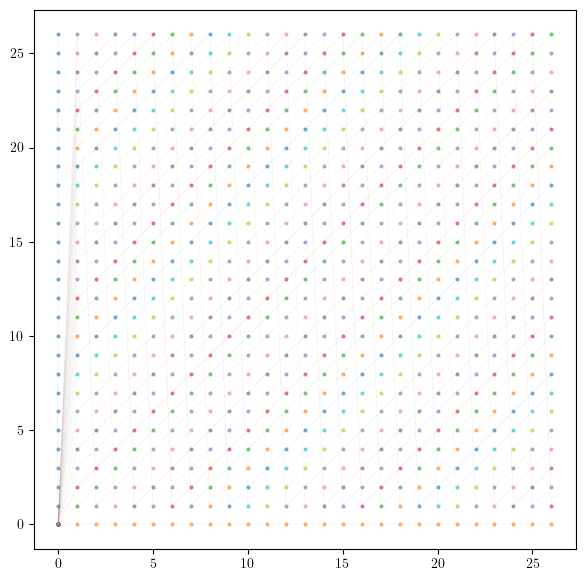

In [8]:
def affineAx(F):
    d = len(F)
    fig, ax = plt.subplots(figsize=(7,7))
    labels = range(d)
    
    return fig, ax

def plotSpread(lines, ax):
    for i, line in enumerate(lines):
        x, y = np.array(line).T
        x = [wootters.toInt(e) for e in x]
        y = [wootters.toInt(e) for e in y]

        alpha = 0.5

        ax.plot(
            x, y,
            marker='o',
            linewidth=0.1,
            markersize=2,
            alpha=alpha
        )
    return ax

fig, ax = affineAx(F)
lines = wootters.Spread()
plotSpread(lines, ax)

<Axes: >

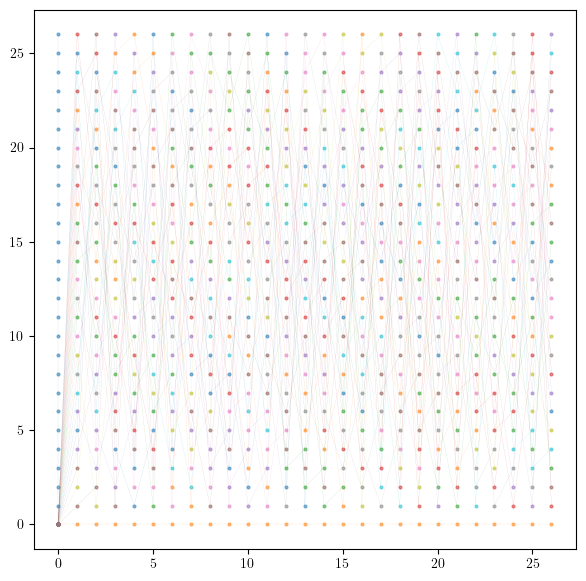

In [9]:
fig, ax = affineAx(F)
lines = kantor.Spread()
plotSpread(lines, ax)

<Axes: >

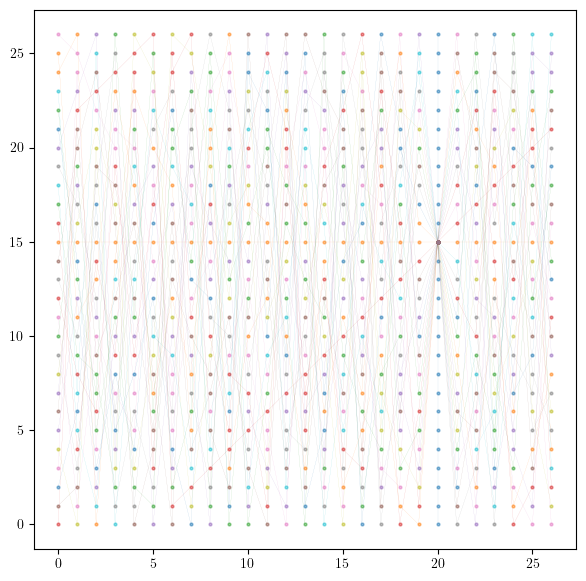

In [82]:
fig, ax = affineAx(F)
lines = wootters.PointLines(F[20], F[15])
plotSpread(lines, ax)

<Axes: >

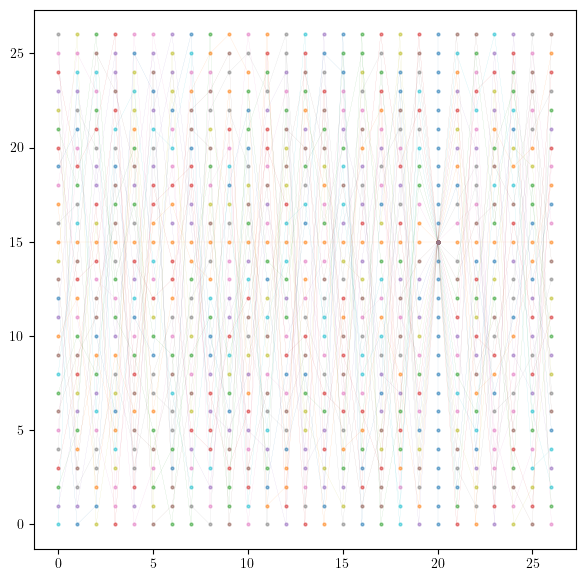

In [83]:
fig, ax = affineAx(F)
lines = kantor.PointLines(F[20], F[15])
plotSpread(lines, ax)

In [12]:
len(lines)

28

$\ket{\psi_1}$ corresponde al primer eigenestado de las estría diagonal.

In [15]:
wootters.toInt(two + two*a + two*a**2)

20

La base es $(1,\alpha,\alpha^2)$. En ésta base tenemos: $(0,0,0) = 0$, $(1,1,1) = 1 + \alpha + \alpha^2$ y $(2,2,2) = 2 + 2\alpha + 2\alpha^2$. Por lo tanto

$$
|000\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle \cong \ket{0}
$$
$$
|111\rangle = |1\rangle \otimes |1\rangle \otimes |1\rangle \cong \ket{1+\alpha+\alpha^2}
$$
$$
|222\rangle = |2\rangle \otimes |2\rangle \otimes |2\rangle \cong \ket{2 + 2\alpha + 2\alpha^2}
$$

In [16]:
def wigner3d(M, rotate=True):
    if rotate:
        M = np.rot90(M, -1)

    n = np.size(M)
    xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
    xpos = xpos.T.flatten() - 0.5
    ypos = ypos.T.flatten() - 0.5
    zpos = np.zeros(n)
    dx = dy = 0.8 * np.ones(n)
    dz = np.real(M.flatten())

    z_min = min(dz)
    z_max = max(dz)
    if z_min == z_max:
        z_min -= 0.1
        z_max += 0.1

    norm = mpl.colors.Normalize(z_min, z_max)
    cmap = mpl.colormaps['viridis']
    colors = cmap(norm(dz))

    fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(projection='3d', azim=145, elev=35)
    ax = fig.add_subplot(projection='3d', azim=-35, elev=35)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    # z axis
    # ax.axes.zaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    ax.set_zlim3d([z_min, z_max])

    cax, kw = mpl.colorbar.make_axes(ax, shrink=.75, pad=.1)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

    return fig, ax

For state $\ket{\psi_1}$.

In [17]:
s1 = mubs[27*2:27*3,0]
Ws1 = wootters.WignerMatrix(wootters.npProj(s1))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

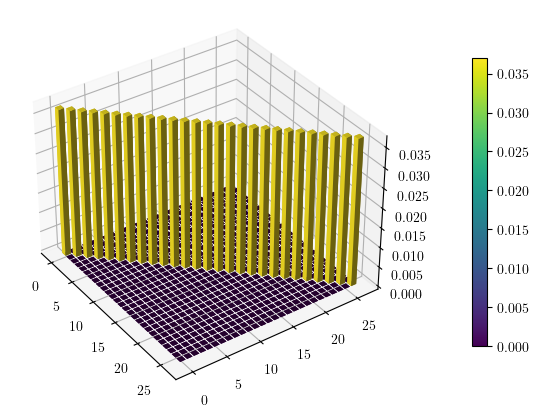

In [18]:
wigner3d(Ws1)

In [19]:
Wks1 = kantor.WignerMatrix(kantor.npProj(s1))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

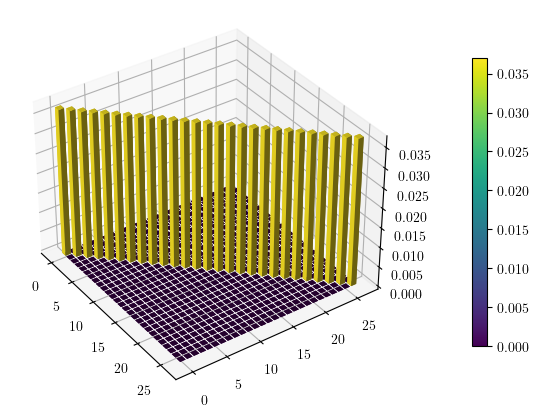

In [20]:
wigner3d(Wks1)

In [21]:
mubs_albert[27*2:27*3,0] == mubs[27*2:27*3,0]

array([ True,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False])

In [48]:
np.all(wootters.A(F[0], F[0]) == kantor.A(F[0], F[0]))

False

In [36]:
A = wootters.A(F[0], F[0])
A.trace()

(0.9999932050704956+0j)

In [37]:
np.all(A == A.conj().T)

True

In [64]:
ghz1 = F.index(0)
ghz2 = F.index(1+a+a**2)
ghz3 = F.index(2+2*a+2*a**2)
ghz = wootters.npProj((mubs[0:27, ghz1] + mubs[0:27, ghz2] + mubs[0:27, ghz3]) / np.sqrt(3))
ghz.trace()

(0.99999994+0j)

In [66]:
Wghz = wootters.WignerMatrix(ghz)

In [67]:
Wghz.sum()

0.9999928077066222

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

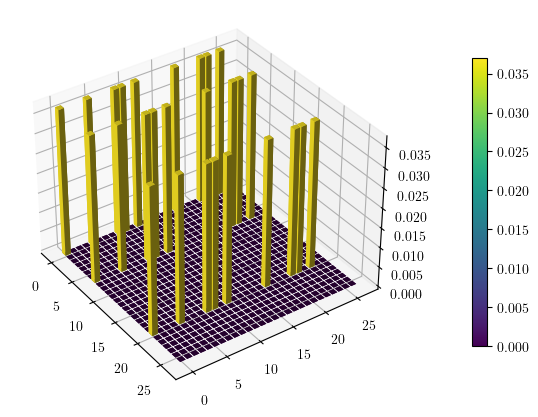

In [69]:
wigner3d(Wghz)

In [70]:
Kghz = kantor.WignerMatrix(ghz)
Kghz.sum()

0.9999927555525612

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

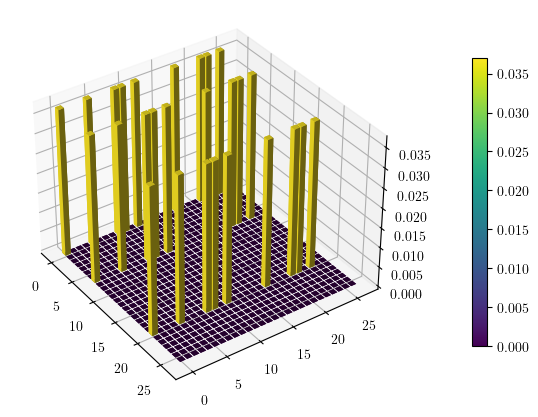

In [71]:
wigner3d(Kghz)

In [74]:
s1 = kantor.npProj(mubs_albert[27*8:27*9,0])
np.all(s1 == s1.conj().T)

True